In [38]:
import json 
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import re
import folium

In [2]:
url = 'https://data.nashville.gov/resource/7qhx-rexh.json?case_request=COVID-19&$limit=50000'

response = requests.get(url) 

In [3]:
violation = pd.read_json(response.text)

In [4]:
violation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   case_number                16173 non-null  int64  
 1   status                     16173 non-null  object 
 2   case_request               16173 non-null  object 
 3   case_subrequest            16172 non-null  object 
 4   additional_subrequest      16154 non-null  object 
 5   date_time_opened           16173 non-null  object 
 6   date_time_closed           16092 non-null  object 
 7   case_origin                16173 non-null  object 
 8   state_issue                16173 non-null  object 
 9   closed_when_created        16173 non-null  object 
 10  incident_address           11915 non-null  object 
 11  incident_city              11189 non-null  object 
 12  incident_council_district  11221 non-null  float64
 13  incident_zip_code          11254 non-null  flo

In [5]:
violation['case_request'].unique()


array(['COVID-19'], dtype=object)

In [6]:
violation['case_subrequest'].unique()

array(['COVID-19 Violations', 'COVID-19 Questions',
       'COVID-19 Guidance for Reopening Businesses',
       'COVID-19 - Submit Input about The Plan to Reopen Nashville', nan],
      dtype=object)

In [7]:
#covid=violation[(violation['case_request']=='Resolved by hubNashville on First Call') |(violation['case_subrequest']=='Resolved by hubNashville on First Call')]

In [8]:
violation

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,incident_address,incident_city,incident_council_district,incident_zip_code,latitude,longitude,mapped_location,contact_type,parent_case
0,498304,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-09T15:29:01.000,2020-11-10T14:33:54.000,hubNashville Community,False,False,7741 US-70S,NASHVILLE,22.0,37221.0,36.080627,-86.960199,"{'latitude': '36.080627', 'longitude': '-86.96...",NaN,NaN
1,498642,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-09T18:31:31.000,2020-11-10T15:08:09.000,Phone,False,False,42nd Ave N & Charlotte Pike,NASHVILLE,24.0,37209.0,36.152370,-86.837014,"{'latitude': '36.1523697', 'longitude': '-86.8...",NaN,NaN
2,499926,New,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-10T19:43:41.000,NaN,hubNashville Community,False,False,1913 Division St,NASHVILLE,19.0,37203.0,36.149665,-86.796882,"{'latitude': '36.14966486160123', 'longitude':...",NaN,NaN
3,499299,Closed,COVID-19,COVID-19 Questions,COVID-19 Questions,2020-11-10T14:12:48.000,2020-11-10T15:50:08.000,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,499547,New,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-10T16:10:40.000,NaN,Phone,False,False,3048 Dickerson Pike,NASHVILLE,2.0,37207.0,36.229119,-86.760494,"{'latitude': '36.2291186', 'longitude': '-86.7...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,336815,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:29:02.000,2020-04-01T18:42:42.000,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16169,336823,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:34:38.000,2020-04-01T18:38:49.000,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16170,336836,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:43:54.000,2020-04-01T18:44:31.000,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16171,330754,Closed,COVID-19,COVID-19 Questions,NaN,2020-03-22T18:51:36.000,2020-03-24T20:18:49.000,hubNashville Community,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
violation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   case_number                16173 non-null  int64  
 1   status                     16173 non-null  object 
 2   case_request               16173 non-null  object 
 3   case_subrequest            16172 non-null  object 
 4   additional_subrequest      16154 non-null  object 
 5   date_time_opened           16173 non-null  object 
 6   date_time_closed           16092 non-null  object 
 7   case_origin                16173 non-null  object 
 8   state_issue                16173 non-null  object 
 9   closed_when_created        16173 non-null  object 
 10  incident_address           11915 non-null  object 
 11  incident_city              11189 non-null  object 
 12  incident_council_district  11221 non-null  float64
 13  incident_zip_code          11254 non-null  flo

In [10]:
violation['dateform']=violation['date_time_opened'].str.replace('T', ' ')

In [11]:
violation['DateTime'] = pd.to_datetime(violation['dateform'])

In [12]:
violation['monthday'] = violation['DateTime'].dt.strftime('%m-%d')


In [13]:
violation['date'] = violation['DateTime'].dt.strftime('%Y-%m-%d')
violation

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,...,incident_zip_code,latitude,longitude,mapped_location,contact_type,parent_case,dateform,DateTime,monthday,date
0,498304,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-09T15:29:01.000,2020-11-10T14:33:54.000,hubNashville Community,False,False,...,37221.0,36.080627,-86.960199,"{'latitude': '36.080627', 'longitude': '-86.96...",NaN,NaN,2020-11-09 15:29:01.000,2020-11-09 15:29:01,11-09,2020-11-09
1,498642,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-09T18:31:31.000,2020-11-10T15:08:09.000,Phone,False,False,...,37209.0,36.152370,-86.837014,"{'latitude': '36.1523697', 'longitude': '-86.8...",NaN,NaN,2020-11-09 18:31:31.000,2020-11-09 18:31:31,11-09,2020-11-09
2,499926,New,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-10T19:43:41.000,NaN,hubNashville Community,False,False,...,37203.0,36.149665,-86.796882,"{'latitude': '36.14966486160123', 'longitude':...",NaN,NaN,2020-11-10 19:43:41.000,2020-11-10 19:43:41,11-10,2020-11-10
3,499299,Closed,COVID-19,COVID-19 Questions,COVID-19 Questions,2020-11-10T14:12:48.000,2020-11-10T15:50:08.000,hubNashville Community,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-10 14:12:48.000,2020-11-10 14:12:48,11-10,2020-11-10
4,499547,New,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-11-10T16:10:40.000,NaN,Phone,False,False,...,37207.0,36.229119,-86.760494,"{'latitude': '36.2291186', 'longitude': '-86.7...",NaN,NaN,2020-11-10 16:10:40.000,2020-11-10 16:10:40,11-10,2020-11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,336815,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:29:02.000,2020-04-01T18:42:42.000,hubNashville Community,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01 18:29:02.000,2020-04-01 18:29:02,04-01,2020-04-01
16169,336823,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:34:38.000,2020-04-01T18:38:49.000,hubNashville Community,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01 18:34:38.000,2020-04-01 18:34:38,04-01,2020-04-01
16170,336836,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,2020-04-01T18:43:54.000,2020-04-01T18:44:31.000,hubNashville Community,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01 18:43:54.000,2020-04-01 18:43:54,04-01,2020-04-01
16171,330754,Closed,COVID-19,COVID-19 Questions,NaN,2020-03-22T18:51:36.000,2020-03-24T20:18:49.000,hubNashville Community,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-22 18:51:36.000,2020-03-22 18:51:36,03-22,2020-03-22


Text(0, 0.5, 'Number of incidents')

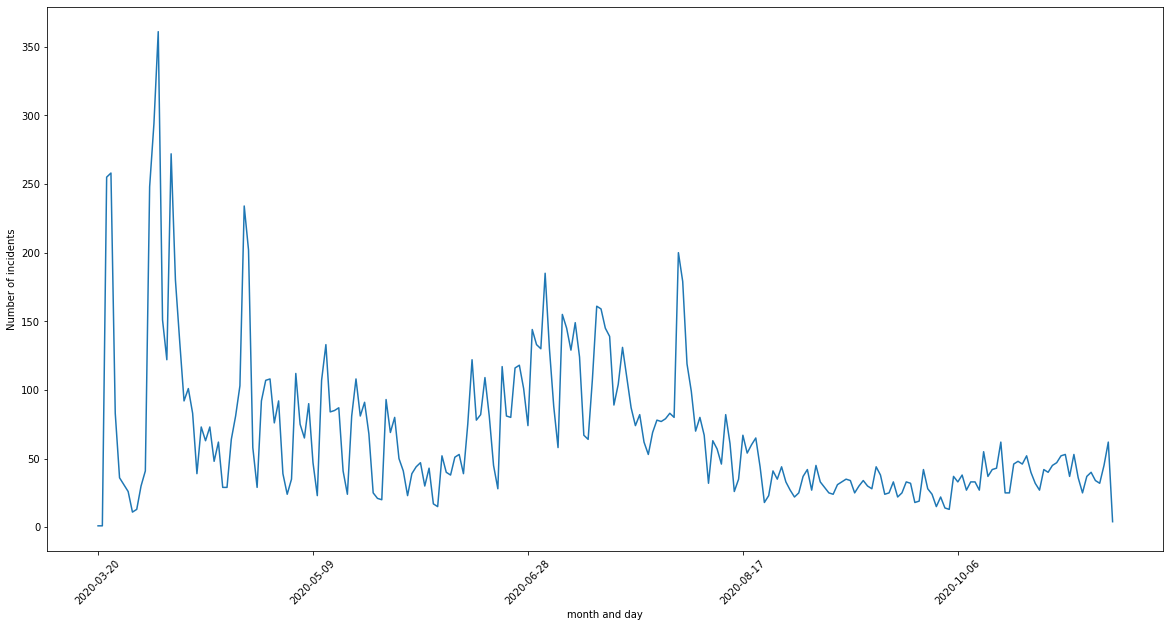

In [14]:
ax= violation['date'].value_counts().sort_index().plot(rot=45, figsize=(20, 10))
ax.set_xlabel("month and day")
ax.set_ylabel("Number of incidents")


In [15]:
violation_city=violation.groupby('incident_city')['case_request'].value_counts()
#violation_cit=pd.DataFrame(violation_city)
#violation_city=violation_city.rename({2:'Number of violations'})
#violation_city =violation_city.reset_index(drop=False)
violation_city

incident_city   case_request
ANTIOCH         COVID-19         491
BRENTWOOD       COVID-19          51
GOODLETTSVILLE  COVID-19         216
HERMITAGE       COVID-19         446
JOELTON         COVID-19          44
LA VERGNE       COVID-19           1
LAVERGNE        COVID-19           9
MADISON         COVID-19         608
NASHVILLE       COVID-19        9073
NOLENSVILLE     COVID-19           5
Nashville       COVID-19           2
OLD HICKORY     COVID-19         215
WHITES CREEK    COVID-19          28
Name: case_request, dtype: int64

Text(0.5, 0, 'Number of incidents')

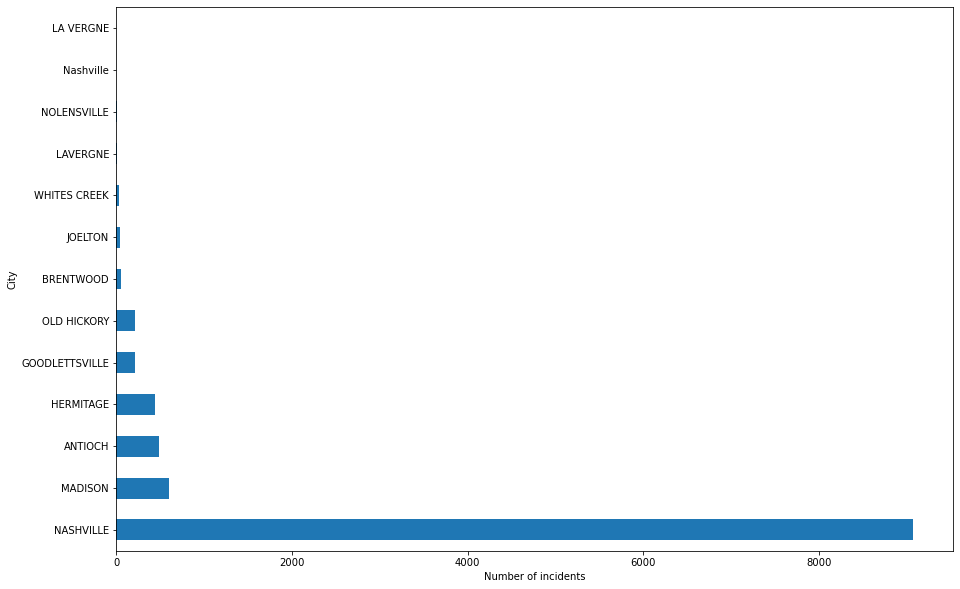

In [16]:
ax=violation['incident_city'].value_counts().plot.barh(figsize=(15,10))
#ax.set_yticklabels(violation['incident_city'])
ax.set_ylabel('City')
ax.set_xlabel("Number of incidents")
#ax.get_legend().remove()

In [17]:
cases=pd.read_csv('data/davidson_cases.csv')

In [18]:
violation_covid=cases.merge(violation, on='date')


In [19]:
violationbydate=violation_covid.groupby('date').size().to_frame('Violation count')
violationbydate=violationbydate.reset_index()

In [20]:
violation_by_date=cases.merge(violationbydate, on='date')
violation_by_date

,date,county,state,fips,cases,deaths,Violation count
0,2020-03-20,Davidson,Tennessee,47037,110,0,1
1,2020-03-21,Davidson,Tennessee,47037,140,2,1
2,2020-03-22,Davidson,Tennessee,47037,167,2,255
3,2020-03-23,Davidson,Tennessee,47037,184,2,258
4,2020-03-24,Davidson,Tennessee,47037,253,2,83
...,...,...,...,...,...,...,...
218,2020-10-24,Davidson,Tennessee,47037,33016,336,32
219,2020-10-25,Davidson,Tennessee,47037,33259,337,27
220,2020-10-26,Davidson,Tennessee,47037,33699,343,42
221,2020-10-27,Davidson,Tennessee,47037,33957,341,40


[Text(0.0, 0, '2020-03-20'),
 Text(2000.0, 0, '2020-03-21'),
 Text(4000.0, 0, '2020-03-22'),
 Text(6000.0, 0, '2020-03-22'),
 Text(8000.0, 0, '2020-03-22'),
 Text(10000.0, 0, '2020-03-22')]

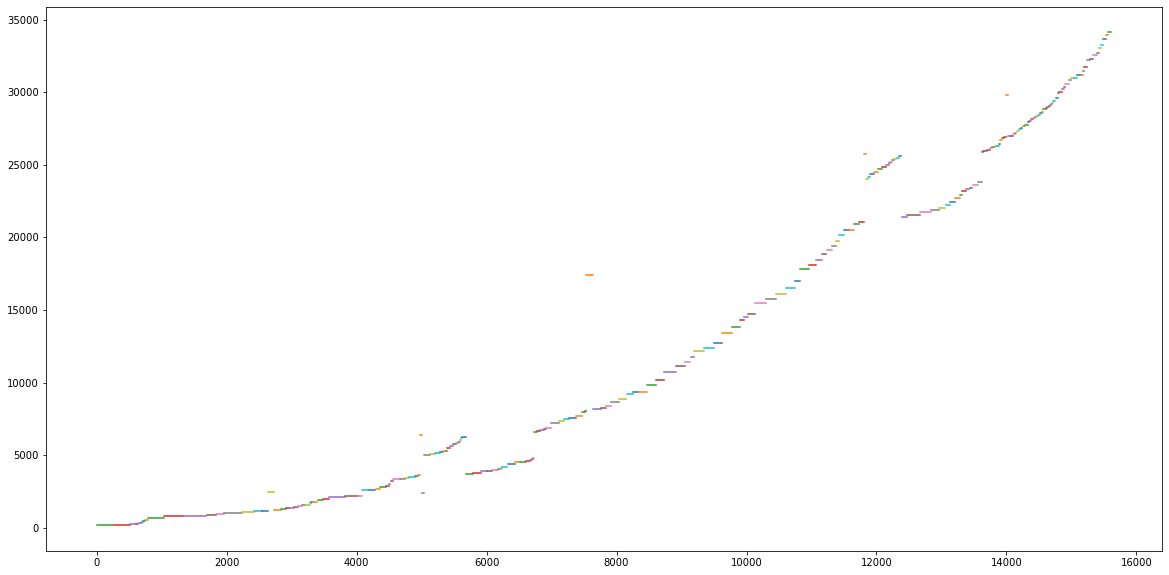

In [21]:
violation_covid.groupby('date')['cases'].plot(figsize=(20, 10))
ax.set_xticklabels(violation_covid['date'])

In [22]:
# multiline plot with group by
for key, grp in violation_by_date.groupby(['date']): 
    ax2.plot(grp['Violation count'], grp['cases'])
   
plt.show()

NameError: name 'ax2' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
ax.plot(violation_by_date['date'], violation_by_date['cases'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Cases', color='blue')
ax.tick_params('y', colors='blue')
ax.tick_params('x',labelrotation=45, which='major')

ax2.plot(violation_by_date['date'], violation_by_date['Violation count'],          
         color='red')
ax2.set_ylabel('Violations', color='red');
ax2.tick_params('y', colors='red')
ax.tick_params('x',labelrotation=45, which='major')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
violation_by_date['cases'].plot(x='date', color='blue')
ax.set_ylabel('Cases', color='blue')
ax.tick_params('y', colors='blue')


violation_by_date['Violation count'].plot(x='date', color='red')
ax2.set_ylabel('Violations', color='red');
ax2.tick_params('y', colors='red')


In [23]:
clustertype=pd.read_csv('data/clusters_by_type.csv')
clustertype

,Cluster Type,Number of Clusters
0,Bar,7
1,Church,2
2,College / University,5
3,Commercial-Warehouse,12
4,Congregate Living,13
5,Construction,19
6,Correctional Facility,9
7,Day Care,7
8,Food Production,2
9,Grocery,1


In [24]:
cluster=pd.read_csv('data/clusters_revised.csv')
cluster

,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.844583
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.817345
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.754560
...,...,...,...,...,...,...
57,One Stone Church Service,Church,9/22/2020,10,36.189960,-86.765149
58,Miss Kelli's,Bar,10/1/2020,14,36.164369,-86.778515
59,Nashville Rescue Mission - Women's Campus,Congregate Living,10/1/2020,70,36.153700,-86.777276
60,Link Systems Electric,Other,10/16/2020,12,36.092924,-86.741684


In [25]:
cluster=pd.DataFrame(cluster)
cluster=cluster.rename(columns={"Latitude":"latitude", "Longitude": "longitude"})

cluster

,Cluster Name,Facility Type,Cluster Start Date,# Cases,latitude,longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.844583
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.817345
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.754560
...,...,...,...,...,...,...
57,One Stone Church Service,Church,9/22/2020,10,36.189960,-86.765149
58,Miss Kelli's,Bar,10/1/2020,14,36.164369,-86.778515
59,Nashville Rescue Mission - Women's Campus,Congregate Living,10/1/2020,70,36.153700,-86.777276
60,Link Systems Electric,Other,10/16/2020,12,36.092924,-86.741684


In [26]:
cluster=cluster.dropna()
cluster

,Cluster Name,Facility Type,Cluster Start Date,# Cases,latitude,longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.844583
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.817345
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.754560
5,Tyson Foods,Commercial-Warehouse,4/6/2020,280,36.331015,-86.709977
6,Nashville Center for Rehab and Healing,LTCF,4/8/2020,12,36.134557,-86.780929
7,CDM Jail,Correctional Facility,4/13/2020,22,36.088200,-86.683980
8,Bordeaux,LTCF,4/15/2020,47,36.193945,-86.831388
9,Cargill,Commercial-Warehouse,4/21/2020,22,36.114254,-86.754589
10,Bethany Center for Rehab and Healing,LTCF,4/27/2020,133,36.049614,-86.716761


In [27]:
cluster.duplicated(['latitude', 'longitude'])

0     False
1     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
14    False
16    False
17    False
18    False
19    False
21    False
23    False
24    False
25    False
26     True
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38     True
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
48    False
49    False
50    False
52    False
57    False
58    False
59     True
60    False
61    False
dtype: bool

In [28]:
cluster=cluster.drop_duplicates(subset=['latitude', 'longitude'], keep='last')

In [29]:
violation_clusters=pd.merge(cluster, violation, on=['latitude', 'longitude'], validate="one_to_many")

In [30]:
violation_clusters

,Cluster Name,Facility Type,Cluster Start Date,# Cases,latitude,longitude,case_number,status,case_request,case_subrequest,...,incident_city,incident_council_district,incident_zip_code,mapped_location,contact_type,parent_case,dateform,DateTime,monthday,date
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655,416316,Closed,COVID-19,COVID-19 Violations,...,NASHVILLE,18.0,37240.0,"{'latitude': '36.1447034', 'longitude': '-86.8...",NaN,NaN,2020-07-14 20:07:09.000,2020-07-14 20:07:09,07-14,2020-07-14
1,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655,339963,Closed,COVID-19,COVID-19 Violations,...,NASHVILLE,18.0,37240.0,"{'latitude': '36.1447034', 'longitude': '-86.8...",NaN,NaN,2020-04-06 14:14:51.000,2020-04-06 14:14:51,04-06,2020-04-06
2,Rolling Mill Hill job site,Construction,6/3/2020,21,36.157460,-86.769873,340492,Closed,COVID-19,COVID-19 Violations,...,NASHVILLE,19.0,37210.0,"{'latitude': '36.1574605', 'longitude': '-86.7...",NaN,NaN,2020-04-06 18:40:51.000,2020-04-06 18:40:51,04-06,2020-04-06
3,Loser's,Bar,6/26/2020,29,36.149673,-86.796748,497638,Closed,COVID-19,COVID-19 Violations,...,NASHVILLE,19.0,37203.0,"{'latitude': '36.149673', 'longitude': '-86.79...",NaN,NaN,2020-11-07 08:31:30.000,2020-11-07 08:31:30,11-07,2020-11-07
4,Loser's,Bar,6/26/2020,29,36.149673,-86.796748,467379,Closed,COVID-19,COVID-19 Violations,...,NASHVILLE,19.0,37203.0,"{'latitude': '36.149673', 'longitude': '-86.79...",NaN,NaN,2020-09-19 02:41:42.000,2020-09-19 02:41:42,09-19,2020-09-19
5,Loser's,Bar,6/26/2020,29,36.149673,-86.796748,420467,Closed,COVID-19,COVID-19 Violations,...,NASHVILLE,19.0,37203.0,"{'latitude': '36.149673', 'longitude': '-86.79...",NaN,NaN,2020-07-19 19:02:31.000,2020-07-19 19:02:31,07-19,2020-07-19
6,Loser's,Bar,6/26/2020,29,36.149673,-86.796748,391726,Closed,COVID-19,COVID-19 Violations,...,NASHVILLE,19.0,37203.0,"{'latitude': '36.149673', 'longitude': '-86.79...",NaN,NaN,2020-06-14 06:20:53.000,2020-06-14 06:20:53,06-14,2020-06-14
7,Tootsie's,Bar,6/26/2020,27,36.160769,-86.778210,426950,Closed,COVID-19,COVID-19 Violations,...,NASHVILLE,19.0,37203.0,"{'latitude': '36.1607689', 'longitude': '-86.7...",NaN,NaN,2020-07-26 14:27:51.000,2020-07-26 14:27:51,07-26,2020-07-26
8,Tootsie's,Bar,6/26/2020,27,36.160769,-86.778210,402594,Closed,COVID-19,COVID-19 Violations,...,NASHVILLE,19.0,37203.0,"{'latitude': '36.1607689', 'longitude': '-86.7...",NaN,NaN,2020-06-29 00:53:12.000,2020-06-29 00:53:12,06-29,2020-06-29
9,Tootsie's,Bar,6/26/2020,27,36.160769,-86.778210,402422,Closed,COVID-19,COVID-19 Violations,...,NASHVILLE,19.0,37203.0,"{'latitude': '36.1607689', 'longitude': '-86.7...",NaN,NaN,2020-06-28 04:46:13.000,2020-06-28 04:46:13,06-28,2020-06-28


In [31]:
violation_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Cluster Name               22 non-null     object        
 1   Facility Type              22 non-null     object        
 2   Cluster Start Date         22 non-null     object        
 3   # Cases                    22 non-null     int64         
 4   latitude                   22 non-null     float64       
 5   longitude                  22 non-null     float64       
 6   case_number                22 non-null     int64         
 7   status                     22 non-null     object        
 8   case_request               22 non-null     object        
 9   case_subrequest            22 non-null     object        
 10  additional_subrequest      22 non-null     object        
 11  date_time_opened           22 non-null     object        
 12  date_time_

In [32]:
violations_clusters=violation_clusters[['Cluster Name', 
                                        'Facility Type', '# Cases', 
                                        'latitude', 'longitude', 'mapped_location','date']]

In [33]:
violations_clusters=pd.DataFrame(violations_clusters)

In [34]:
geometry = [Point(xy) for xy in zip(violations_clusters['longitude'], violations_clusters['latitude'])]

In [39]:
crs = {'init': 'epsg:4326'}
Covid19_geo = gpd.GeoDataFrame(violations_clusters, crs=crs, geometry=geometry)

/Users/turik1/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [68]:
m = folium.Map([36.148465, -86.767960], zoom_start= 14, tiles='cartodbpositron')
folium.GeoJson(Covid19_geo).add_to(m)

m